In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
wsmi_in = {'0': [np.float64(0.036656142321741976), np.float64(0.03398842857235132), np.float64(0.035874988674067194), np.float64(0.03706765424792823), np.float64(0.03508264594017548), np.float64(0.03476010087119118), np.float64(0.034343459745905), np.float64(0.035276800082399876)], '1': [np.float64(0.05266328380302638), np.float64(0.05077608338375056), np.float64(0.05212445998512974), np.float64(0.05287310005089255), np.float64(0.05101333894286059), np.float64(0.050201491497332454), np.float64(0.05075599302252462), np.float64(0.04949954713987178)], '2': [np.float64(0.07802728183992973), np.float64(0.07786558888582958), np.float64(0.07688994406263376), np.float64(0.0773695361968221), np.float64(0.07690492364341085), np.float64(0.08115945479091455), np.float64(0.07633116158049645), np.float64(0.07455006073761283)], '3': [np.float64(0.10935295614283713), np.float64(0.11033362060614012), np.float64(0.10945962726566402), np.float64(0.11066959502604735), np.float64(0.11120212260581025), np.float64(0.12019455938377846), np.float64(0.11195459720252117), np.float64(0.10852793560090308)]}
wsmi_out = {'0': [np.float64(0.03427001505853414), np.float64(0.03401794659489621), np.float64(0.035880913490547464), np.float64(0.035144605480118066), np.float64(0.03401455618206574), np.float64(0.03368970447657152), np.float64(0.03397433867055892), np.float64(0.03432752214713661)], '1': [np.float64(0.050597898327591276), np.float64(0.04864679378724461), np.float64(0.05053460383287171), np.float64(0.050606173934641466), np.float64(0.051312420682570664), np.float64(0.05095391728879947), np.float64(0.05187584232661713), np.float64(0.04874812443419421)], '2': [np.float64(0.07711013149449471), np.float64(0.0755174970765574), np.float64(0.07469096857052686), np.float64(0.07706412389469314), np.float64(0.07891976695485285), np.float64(0.07993562483928308), np.float64(0.0801685358467331), np.float64(0.07386840510949243)], '3': [np.float64(0.11368736234276458), np.float64(0.11357227646970522), np.float64(0.1075181946758216), np.float64(0.11319377137187671), np.float64(0.11531492865703678), np.float64(0.11713445316485191), np.float64(0.11491271283422445), np.float64(0.10855219098696245)]}

the following is for neuron norm and 2ms gaussian

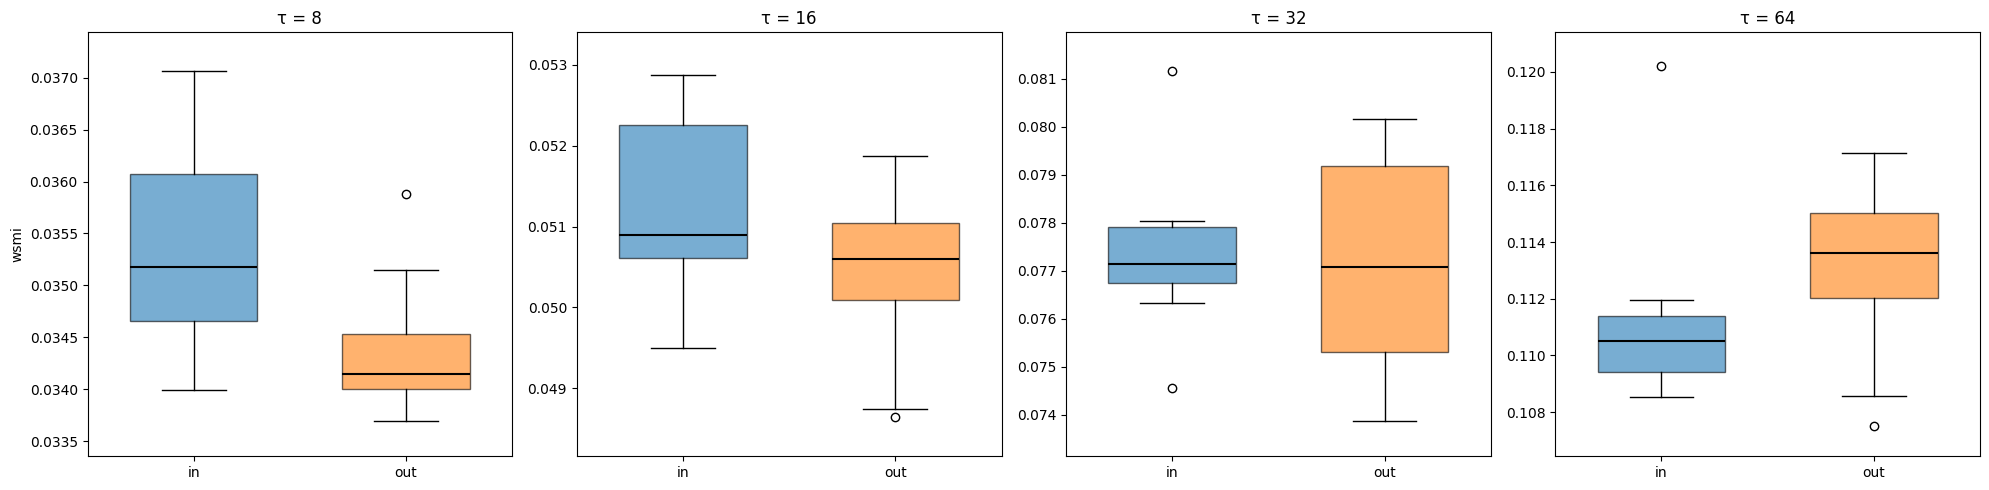

τ = 8: t-statistic = 2.091, p-value = 0.05528
τ = 16: t-statistic = 1.412, p-value = 0.1798
τ = 32: t-statistic = 0.2131, p-value = 0.8343
τ = 64: t-statistic = -0.8687, p-value = 0.3997


In [16]:
def plot_wsmi_boxplots(in_data, out_data, tau_values):
    # figure out overall y‑limits (optional; you're also setting per‑panel)
    all_vals = []
    for k in in_data:
        all_vals += in_data[k] + out_data[k]
    global_min = min(all_vals) * 0.99
    global_max = max(all_vals) * 1.01

    fig, axs = plt.subplots(1, len(tau_values), figsize=(20, 5), sharey=False)

    for idx, tau_label in enumerate(tau_values):
        data_in  = in_data[str(idx)]
        data_out = out_data[str(idx)]

        # draw filled boxplots
        bp = axs[idx].boxplot(
            [data_in, data_out],
            widths=0.6,
            patch_artist=True,
            notch=False
        )

        # color the two boxes
        colors = ['C0', 'C1']  # Matplotlib default blue & orange
        for box, color in zip(bp['boxes'], colors):
            box.set_facecolor(color)
            box.set_alpha(0.6)

        # make medians solid black
        for median in bp['medians']:
            median.set(color='k', linewidth=1.5)

        # ensure whiskers & caps are black
        for whisker in bp['whiskers']:
            whisker.set(color='k')
        for cap in bp['caps']:
            cap.set(color='k')

        # axis labels & title
        axs[idx].set_xticks([1, 2])
        axs[idx].set_xticklabels(['in', 'out'])
        axs[idx].set_title(f'τ = {tau_label}')
        if idx == 0:
            axs[idx].set_ylabel('wsmi')

        # local y‑limits (optional; or use global_min/global_max)
        local_min = min(data_in + data_out) * 0.99
        local_max = max(data_in + data_out) * 1.01
        axs[idx].set_ylim(local_min, local_max)

    plt.tight_layout()
    plt.show()

tau_values = [8, 16, 32, 64]
plot_wsmi_boxplots(wsmi_in, wsmi_out, tau_values)

#ttest for each tau
from scipy.stats import ttest_ind
for idx, tau_label in enumerate(tau_values):
    data_in  = wsmi_in[str(idx)]
    data_out = wsmi_out[str(idx)]
    t_stat, p_val = ttest_ind(data_in, data_out)
    print(f"τ = {tau_label}: t-statistic = {t_stat:.4}, p-value = {p_val:.4}")



In [5]:
from scipy.stats import ttest_rel

for idx, τ in enumerate(tau_values):
    t, p = ttest_rel(wsmi_in[str(idx)], wsmi_out[str(idx)])
    print(f"τ={τ}: p = {p:.3f}")


τ=8: p = 0.016
τ=16: p = 0.135
τ=32: p = 0.771
τ=64: p = 0.171


In [6]:
wsmi_in = {'0': [np.float64(0.03493973269799783), np.float64(0.03298318761931437), np.float64(0.035305120112666386), np.float64(0.03536632109091566), np.float64(0.03384282837647269), np.float64(0.032944269730835654), np.float64(0.03263341499919592), np.float64(0.032511414060521215)], '1': [np.float64(0.04936471174541372), np.float64(0.04772880400739661), np.float64(0.05076054701424772), np.float64(0.05128780546283857), np.float64(0.0500374116932382), np.float64(0.047410952554312755), np.float64(0.04842392673702617), np.float64(0.047094409141033224)], '2': [np.float64(0.07336663475636437), np.float64(0.0716360057232107), np.float64(0.07389712131685021), np.float64(0.07289636675714402), np.float64(0.07359039019447682), np.float64(0.07394632197266177), np.float64(0.07304933550516195), np.float64(0.07225862344968172)], '3': [np.float64(0.10249731094351056), np.float64(0.09884902456856531), np.float64(0.1026654735433511), np.float64(0.10226525593383629), np.float64(0.10308509489074529), np.float64(0.10857995851171869), np.float64(0.10431584205176989), np.float64(0.10325204858594789)]}
wsmi_out = {'0': [np.float64(0.03514228937760136), np.float64(0.0335405237056227), np.float64(0.03600305470024555), np.float64(0.034076412418071744), np.float64(0.03436752897837044), np.float64(0.03337973923919577), np.float64(0.03305839516225599), np.float64(0.03399955518516205)], '1': [np.float64(0.04964097873030548), np.float64(0.048785979838882665), np.float64(0.05122308436468555), np.float64(0.050740424688590025), np.float64(0.0512153901189863), np.float64(0.04824420760380278), np.float64(0.050735193024075934), np.float64(0.04998295270619949)], '2': [np.float64(0.07291182277910702), np.float64(0.0723925285724985), np.float64(0.07435318795909825), np.float64(0.07453425923597116), np.float64(0.07855379329219943), np.float64(0.07472351672862865), np.float64(0.07724236939791627), np.float64(0.0755614843293748)], '3': [np.float64(0.10605498846020281), np.float64(0.10426941325798315), np.float64(0.10384625456536851), np.float64(0.1064951105062061), np.float64(0.10959775292993204), np.float64(0.10747823626769287), np.float64(0.10928290735898726), np.float64(0.10574824559531606)]}

the following is for 2ms gaussian + no neuron normalisation

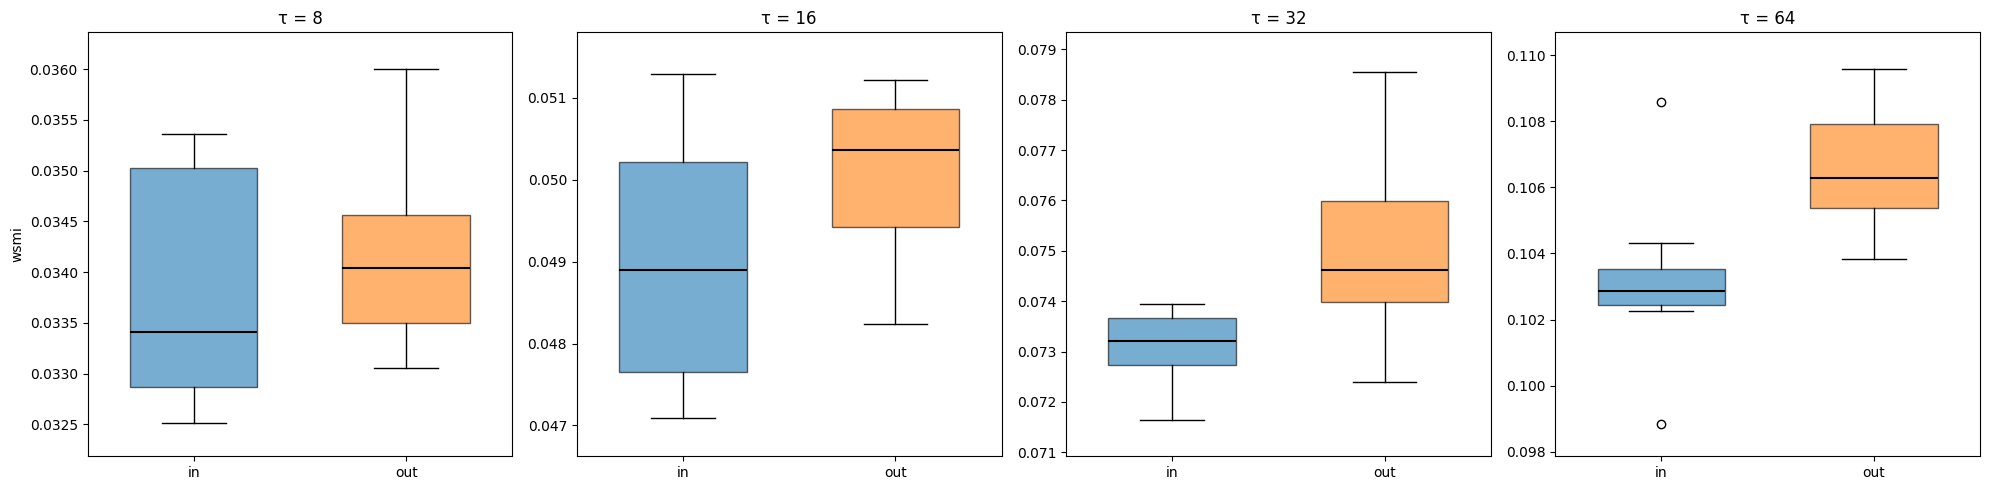

τ=8: p = 0.208
τ=16: p = 0.030
τ=32: p = 0.026
τ=64: p = 0.006


In [7]:
#calling again
plot_wsmi_boxplots(wsmi_in, wsmi_out, tau_values)
from scipy.stats import ttest_rel   


for idx, τ in enumerate(tau_values):
    t, p = ttest_rel(wsmi_in[str(idx)], wsmi_out[str(idx)])
    print(f"τ={τ}: p = {p:.3f}")


below is neuron norm + 0.5ms gaussian

In [8]:
wsmi_in = {'0': [np.float64(0.0388983656785322), np.float64(0.036567824178564044), np.float64(0.038611536506750296), np.float64(0.03737302188361767), np.float64(0.03554833133832312), np.float64(0.03532280797334646), np.float64(0.03495896248572711), np.float64(0.0365508073856117)], '1': [np.float64(0.05420054109792894), np.float64(0.05231994622283214), np.float64(0.053602724772887175), np.float64(0.05381975187125161), np.float64(0.051370467277277815), np.float64(0.050550476717474674), np.float64(0.051687531587254136), np.float64(0.050064635307755345)], '2': [np.float64(0.07891868062844976), np.float64(0.07876199738937213), np.float64(0.07765526424274506), np.float64(0.07798531120646489), np.float64(0.07724945406148336), np.float64(0.08140816273878924), np.float64(0.07692212157605567), np.float64(0.07494716490282967)], '3': [np.float64(0.1102003603382376), np.float64(0.11120031416503179), np.float64(0.1098494980049454), np.float64(0.11098259730170645), np.float64(0.11131902774922955), np.float64(0.12047956442061208), np.float64(0.11226401772413291), np.float64(0.1088115686624411)]} 
wsmi_out = {'0': [np.float64(0.035937389634305525), np.float64(0.035558486443067666), np.float64(0.037301249427767635), np.float64(0.03501640952096857), np.float64(0.035828745511817514), np.float64(0.035577489886185545), np.float64(0.034811411462501655), np.float64(0.037507107848924554)], '1': [np.float64(0.051311672838020975), np.float64(0.049920581837605456), np.float64(0.05151274389207773), np.float64(0.05040885123487138), np.float64(0.052204696344964684), np.float64(0.05235030729797099), np.float64(0.05237745347454692), np.float64(0.05082995711449531)], '2': [np.float64(0.07699437797578375), np.float64(0.07613916419918337), np.float64(0.07516428982509159), np.float64(0.07671435224158202), np.float64(0.07917705353026207), np.float64(0.08059571240569194), np.float64(0.08090000605800637), np.float64(0.0754232848324477)], '3': [np.float64(0.11331332152234286), np.float64(0.11397026999283258), np.float64(0.10845523161490861), np.float64(0.11235364612646973), np.float64(0.11530253377522176), np.float64(0.11770011670970353), np.float64(0.11534744005253499), np.float64(0.1096622474370975)]}

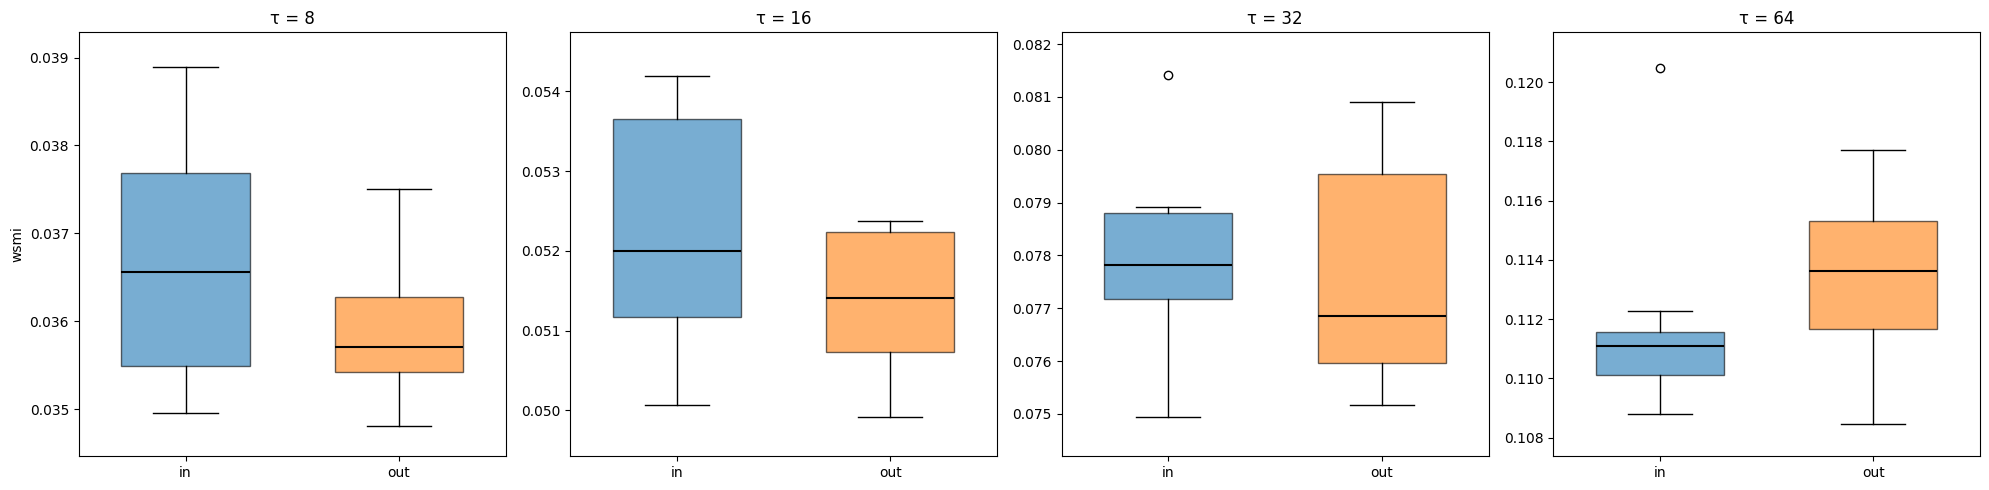

τ=8: p = 0.149
τ=16: p = 0.286
τ=32: p = 0.690
τ=64: p = 0.147


In [9]:
#calling again
plot_wsmi_boxplots(wsmi_in, wsmi_out, tau_values)
from scipy.stats import ttest_rel   


for idx, τ in enumerate(tau_values):
    t, p = ttest_rel(wsmi_in[str(idx)], wsmi_out[str(idx)])
    print(f"τ={τ}: p = {p:.3f}")


below is for a 4ms gaussian + norm

In [10]:
wsmi_in = {'0': [np.float64(0.031198127493859237), np.float64(0.031085867331622833), np.float64(0.0327025933311557), np.float64(0.03418444862075801), np.float64(0.03231326574906681), np.float64(0.031233805707115137), np.float64(0.030540711078278104), np.float64(0.030550977620359167)], '1': [np.float64(0.04829309899701337), np.float64(0.04783814377148948), np.float64(0.049213582598629735), np.float64(0.04989949307376872), np.float64(0.049032101748005305), np.float64(0.04796770694388425), np.float64(0.04816296988700502), np.float64(0.046339467790570917)], '2': [np.float64(0.07490873732194746), np.float64(0.0756694250467036), np.float64(0.07447630366990599), np.float64(0.07524986793371276), np.float64(0.07539365187144682), np.float64(0.07917252588822837), np.float64(0.07439774733493493), np.float64(0.07207988404843362)], '3': [np.float64(0.10684080243341641), np.float64(0.108634425632708), np.float64(0.10739090860360961), np.float64(0.1090533662198648), np.float64(0.10960434950264736), np.float64(0.11838455846529819), np.float64(0.11031241798628777), np.float64(0.10640010704629599)]}
wsmi_out =  {'0': [np.float64(0.03148305199829097), np.float64(0.031422449852055875), np.float64(0.031764373817744246), np.float64(0.03216605812397371), np.float64(0.031322493419938105), np.float64(0.0311132201830637), np.float64(0.030115571763760597), np.float64(0.03164277757722144)], '1': [np.float64(0.04806768443218354), np.float64(0.04676184120078953), np.float64(0.04729079947107591), np.float64(0.04833589061178484), np.float64(0.049101825791794895), np.float64(0.04918019680623785), np.float64(0.04933935647523046), np.float64(0.046734240376452824)], '2': [np.float64(0.07542239512093211), np.float64(0.07393098064170107), np.float64(0.07257268112709322), np.float64(0.07516352969136321), np.float64(0.07708348743581124), np.float64(0.0782269351054639), np.float64(0.07780157639777789), np.float64(0.07231990923153492)], '3': [np.float64(0.11234461633109598), np.float64(0.1122030261645752), np.float64(0.10597845378863685), np.float64(0.11220802138249626), np.float64(0.11377497254450639), np.float64(0.11590098448641185), np.float64(0.11303065438586582), np.float64(0.10724948984902767)]}

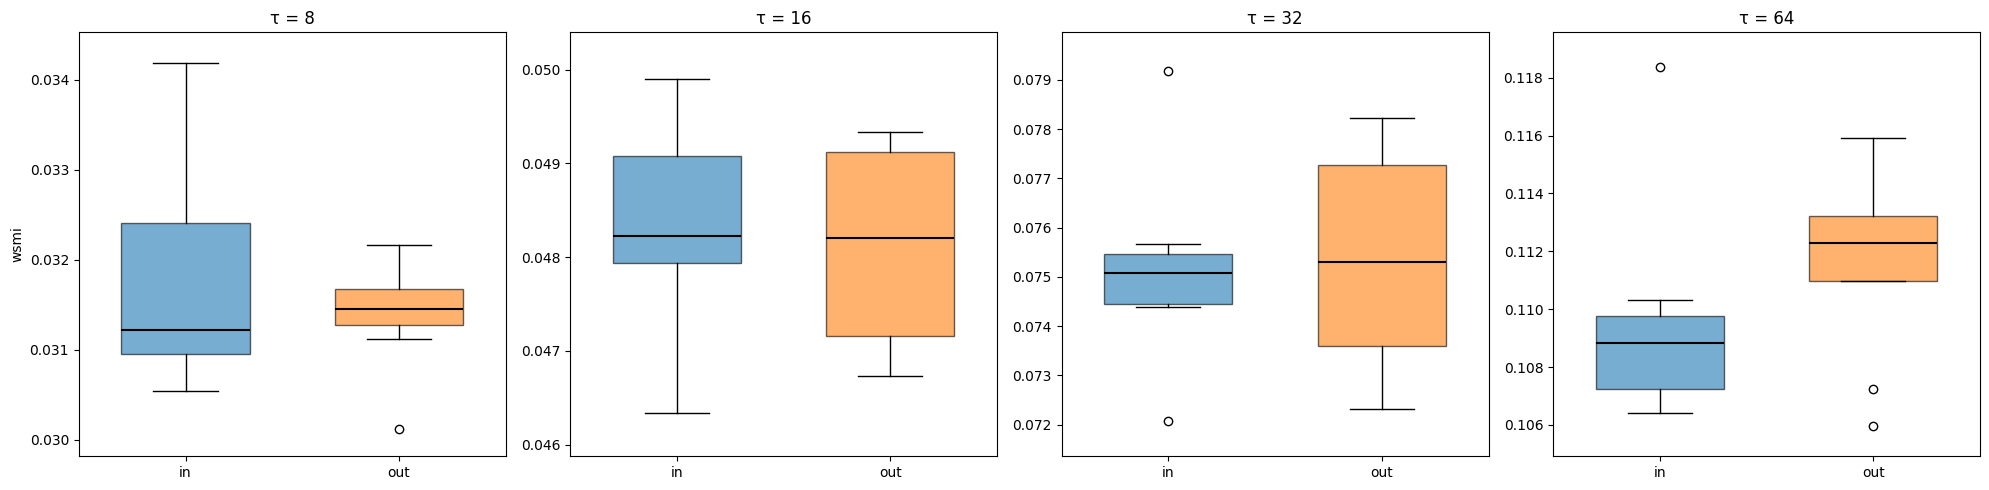

τ=8: p = 0.344
τ=16: p = 0.583
τ=32: p = 0.822
τ=64: p = 0.081


In [11]:
#calling again
plot_wsmi_boxplots(wsmi_in, wsmi_out, tau_values)
from scipy.stats import ttest_rel   


for idx, τ in enumerate(tau_values):
    t, p = ttest_rel(wsmi_in[str(idx)], wsmi_out[str(idx)])
    print(f"τ={τ}: p = {p:.3f}")
